In [1]:
#pip install opencv-python

In [3]:
import pandas as pd
#list of useful imports that  I will use
%matplotlib inline
import os

import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns
import random
import pickle

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [5]:
df=pd.read_csv(r"C:\Users\SONA\Music\fakeId\DATASET\twitter_data.csv")
df

,UserID,profile pic,No Of Abuse Report,posts,No Of Rejected Friend Requests,No Of Freind Requests Thar Are Not Accepted,No Of Friends,follows,No Of Followers,No Of Likes To Unknown Account,No Of Comments Per Day,Fake Or Not Category
0,1,1,37,32,415,204,290,955,838,26,53,1
1,2,1,63,286,383,542,652,533,349,37,58,1
2,3,1,10,13,151,244,863,98,271,73,11,1
3,4,1,83,679,54,604,496,651,937,37,55,1
4,5,1,47,6,834,326,401,126,928,80,78,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,79,0,966,886,135,34,881,87,85,1
996,997,0,69,0,47,344,944,8,216,3,44,1
997,998,0,16,0,556,104,896,0,958,49,97,0
998,999,0,8,6,169,944,95,213,874,6,26,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   UserID                                       1000 non-null   int64
 1   profile pic                                  1000 non-null   int64
 2   No Of Abuse Report                           1000 non-null   int64
 3   posts                                        1000 non-null   int64
 4   No Of Rejected Friend Requests               1000 non-null   int64
 5   No Of Freind Requests Thar Are Not Accepted  1000 non-null   int64
 6   No Of Friends                                1000 non-null   int64
 7   follows                                      1000 non-null   int64
 8   No Of Followers                              1000 non-null   int64
 9   No Of Likes To Unknown Account               1000 non-null   int64
 10  No Of Comments Per Day   

In [9]:
df.describe()

,UserID,profile pic,No Of Abuse Report,posts,No Of Rejected Friend Requests,No Of Freind Requests Thar Are Not Accepted,No Of Friends,follows,No Of Followers,No Of Likes To Unknown Account,No Of Comments Per Day,Fake Or Not Category
count,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,0.78400,49.02100,84.608000,515.640000,490.759000,515.005000,594.581000,499.631000,50.09300,48.982000,0.835000
std,288.819436,0.41172,28.99219,323.816382,286.208158,290.129992,290.721792,1027.536739,284.147801,28.25262,29.123253,0.371366
min,1.000000,0.00000,1.00000,0.000000,2.000000,3.000000,3.000000,0.000000,3.000000,1.00000,1.000000,0.000000
25%,250.750000,1.00000,24.00000,0.000000,289.000000,227.000000,269.000000,82.000000,259.000000,27.00000,24.000000,1.000000
50%,500.500000,1.00000,49.00000,7.000000,519.000000,478.500000,517.500000,324.000000,487.000000,51.00000,47.000000,1.000000
75%,750.250000,1.00000,73.00000,62.000000,770.250000,747.500000,758.250000,645.000000,744.500000,72.25000,73.250000,1.000000
max,1000.000000,1.00000,100.00000,7389.000000,1000.000000,1000.000000,1000.000000,7500.000000,998.000000,100.00000,100.000000,1.000000


In [11]:
df.corr()

,UserID,profile pic,No Of Abuse Report,posts,No Of Rejected Friend Requests,No Of Freind Requests Thar Are Not Accepted,No Of Friends,follows,No Of Followers,No Of Likes To Unknown Account,No Of Comments Per Day,Fake Or Not Category
UserID,1.000000,0.001751,0.019625,-0.196542,0.029598,0.027259,-0.027041,0.023861,-0.016801,0.058606,-0.006032,0.010476
profile pic,0.001751,1.000000,0.018075,0.132506,-0.047704,-0.009093,0.062831,0.152542,0.017765,0.019456,0.018125,0.021997
No Of Abuse Report,0.019625,0.018075,1.000000,0.045601,-0.037451,-0.008148,0.009138,0.015592,-0.025857,0.044023,-0.060194,0.519105
posts,-0.196542,0.132506,0.045601,1.000000,0.038399,-0.027624,0.058744,0.081478,0.006360,0.036102,-0.004441,0.026107
No Of Rejected Friend Requests,0.029598,-0.047704,-0.037451,0.038399,1.000000,-0.053350,-0.029151,-0.053626,-0.016160,0.084475,0.047696,0.020480
No Of Freind Requests Thar Are Not Accepted,0.027259,-0.009093,-0.008148,-0.027624,-0.053350,1.000000,0.042993,0.014267,-0.000556,0.007758,0.013182,-0.004058
No Of Friends,-0.027041,0.062831,0.009138,0.058744,-0.029151,0.042993,1.000000,0.029266,0.016542,-0.047558,0.008872,-0.007827
follows,0.023861,0.152542,0.015592,0.081478,-0.053626,0.014267,0.029266,1.000000,-0.005518,0.009394,-0.033934,0.016686
No Of Followers,-0.016801,0.017765,-0.025857,0.006360,-0.016160,-0.000556,0.016542,-0.005518,1.000000,-0.033377,0.063556,-0.026465
No Of Likes To Unknown Account,0.058606,0.019456,0.044023,0.036102,0.084475,0.007758,-0.047558,0.009394,-0.033377,1.000000,0.023088,0.400259


In [13]:
df["Fake Or Not Category"].value_counts()

Fake Or Not Category
1    835
0    165
Name: count, dtype: int64

In [15]:
df.isnull().sum()

UserID                                         0
profile pic                                    0
No Of Abuse Report                             0
posts                                          0
No Of Rejected Friend Requests                 0
No Of Freind Requests Thar Are Not Accepted    0
No Of Friends                                  0
follows                                        0
No Of Followers                                0
No Of Likes To Unknown Account                 0
No Of Comments Per Day                         0
Fake Or Not Category                           0
dtype: int64

C:\Users\SONA\AppData\Local\Temp\ipykernel_25316\1716797170.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Fake Or Not Category", data=df, palette=sns.color_palette("cubehelix", 4))
C:\Users\SONA\AppData\Local\Temp\ipykernel_25316\1716797170.py:3: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax = sns.countplot(x="Fake Or Not Category", data=df, palette=sns.color_palette("cubehelix", 4))


Text(0.5, 0, 'Class')

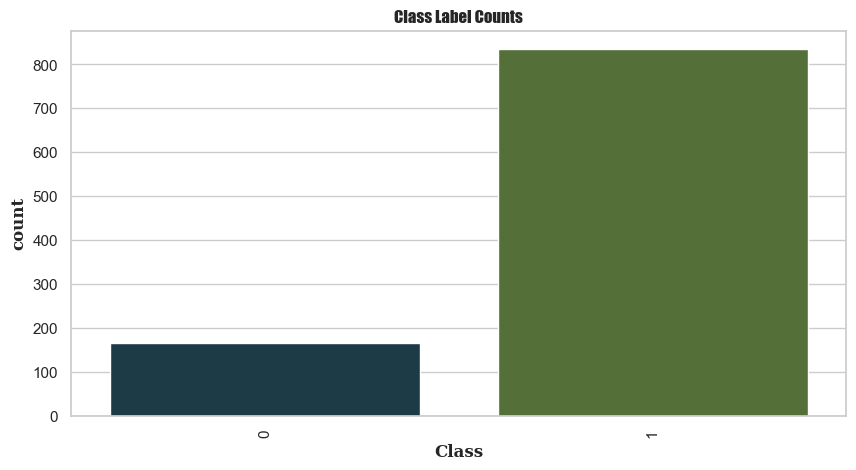

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Fake Or Not Category", data=df, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class", {"fontname": "serif", "fontweight":"bold"}) 

In [23]:
df = df.drop_duplicates()

In [25]:
df.shape

(1000, 12)

In [27]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df[df['Fake Or Not Category']== 1]
df_minority = df[df['Fake Or Not Category']== 0]
 
# Downsample majority class and upsample the minority class
df_minority_upsampled = resample(df_minority, replace=True,n_samples=500,random_state=100) 
df_majority_downsampled = resample(df_majority, replace=False,n_samples=500,random_state=100) 
 
# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_minority_upsampled, df_majority_downsampled])
 
# Display new class counts
#df_balanced['Or Not Category'].value_counts()

C:\Users\SONA\AppData\Local\Temp\ipykernel_25316\1792864061.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Fake Or Not Category", data=df_balanced, palette=sns.color_palette("cubehelix", 4))
C:\Users\SONA\AppData\Local\Temp\ipykernel_25316\1792864061.py:3: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax = sns.countplot(x="Fake Or Not Category", data=df_balanced, palette=sns.color_palette("cubehelix", 4))


Text(0.5, 0, 'Class')

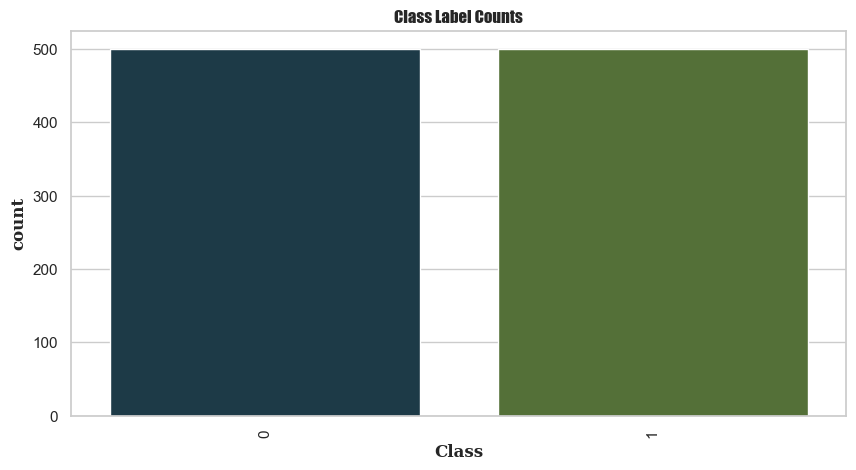

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Fake Or Not Category", data=df_balanced, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class", {"fontname": "serif", "fontweight":"bold"}) 

In [31]:
df=df_balanced

In [33]:
df.head()

,UserID,profile pic,No Of Abuse Report,posts,No Of Rejected Friend Requests,No Of Freind Requests Thar Are Not Accepted,No Of Friends,follows,No Of Followers,No Of Likes To Unknown Account,No Of Comments Per Day,Fake Or Not Category
38,39,1,2,74,625,897,985,112,743,17,36,0
132,133,1,26,92,863,168,713,3296,387,46,21,0
375,376,0,29,0,709,363,404,69,303,6,34,0
634,635,1,18,145,3,475,604,474,954,46,77,0
520,521,0,5,0,408,155,7,58,426,24,25,0


In [35]:
df.columns

Index(['UserID', 'profile pic', 'No Of Abuse Report', 'posts',
       'No Of Rejected Friend Requests',
       'No Of Freind Requests Thar Are Not Accepted', 'No Of Friends',
       'follows', 'No Of Followers', 'No Of Likes To Unknown Account',
       'No Of Comments Per Day', 'Fake Or Not Category'],
      dtype='object')

In [37]:
df= df.drop(columns=["UserID","profile pic"])
df

,No Of Abuse Report,posts,No Of Rejected Friend Requests,No Of Freind Requests Thar Are Not Accepted,No Of Friends,follows,No Of Followers,No Of Likes To Unknown Account,No Of Comments Per Day,Fake Or Not Category
38,2,74,625,897,985,112,743,17,36,0
132,26,92,863,168,713,3296,387,46,21,0
375,29,0,709,363,404,69,303,6,34,0
634,18,145,3,475,604,474,954,46,77,0
520,5,0,408,155,7,58,426,24,25,0
...,...,...,...,...,...,...,...,...,...,...
404,92,0,997,195,19,130,770,19,94,1
669,41,15,709,922,17,3239,287,12,15,1
819,69,84,247,936,3,164,742,68,34,1
285,66,5,941,359,764,408,457,83,47,1


In [39]:
x = df.drop(columns=['Fake Or Not Category'])
y = df['Fake Or Not Category']

In [41]:
x.shape

(1000, 9)

In [43]:
y.shape

(1000,)

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,stratify=y ,random_state=40)

In [47]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [51]:
pd.DataFrame(x_test).to_csv(r"C:\Users\SONA\Music\fakeId\CODE\modified frond end_userinput\test.csv")

# KNN

AUC on Test data is 0.89
AUC on Train data is 0.9214285714285714
---------------------------


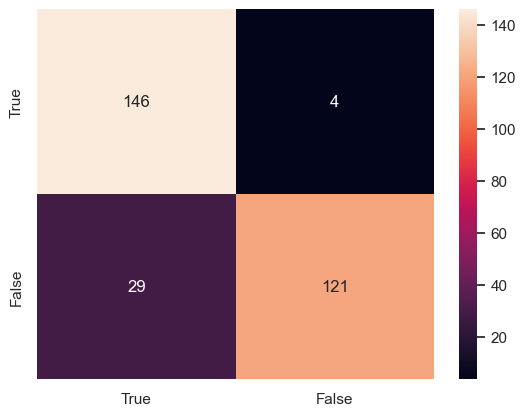

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(x_train, y_train)

import pickle
filename = r'C:\Users\SONA\Music\fakeId\CODE\modified frond end_userinput\knn_Fake.pkl'
pickle.dump(knn_model, open(filename, 'wb'))


pred_test =knn_model.predict(x_test)
test_accuracy = accuracy_score(y_test, pred_test)
pred_train = knn_model.predict(x_train)
train_accuracy =accuracy_score(y_train,pred_train)




print("AUC on Test data is " +str(accuracy_score(y_test,pred_test)))
print("AUC on Train data is " +str(accuracy_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names =['True','False']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [59]:
all_model_result = pd.DataFrame(columns=[ 'Classifier' , 'Train-Accuracy', 'Test-Accuracy' ])
new = ['KNN-Classifier',train_accuracy, test_accuracy]
all_model_result.loc[0] = new

# LOGISTIC REGRESSION

AUC on Test data is 0.9266666666666666
AUC on Train data is 0.9414285714285714
---------------------------


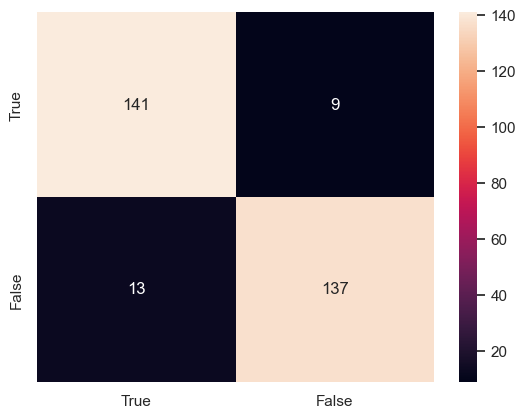

In [64]:
from sklearn.linear_model import LogisticRegression 
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

import pickle
filename = r'C:\Users\SONA\Music\fakeId\CODE\modified frond end_userinput\LR_Fake.pkl'
pickle.dump(log_model, open(filename, 'wb'))


pred_test1 =log_model.predict(x_test)
test_accuracy1 = accuracy_score(y_test, pred_test1)
pred_train = log_model.predict(x_train)
train_accuracy1 =accuracy_score(y_train,pred_train)




print("AUC on Test data is " +str(accuracy_score(y_test,pred_test1)))
print("AUC on Train data is " +str(accuracy_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names =['True','False']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test1.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [66]:
new = ['Logistic regression',train_accuracy1, test_accuracy1]
all_model_result.loc[1] = new

# DECISION TREE

In [69]:
from sklearn.tree import DecisionTreeClassifier

dept = [1, 5, 10, 50, 100, 500,800, 1000]
min_samples =  [5, 10, 100, 500]


param_grid={'min_samples_split':min_samples , 'max_depth':dept}
clf = DecisionTreeClassifier()
model = GridSearchCV(clf,param_grid,scoring='accuracy',n_jobs=-1,cv=3)
model.fit(x_train,y_train)
print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal min_samples_split 5
optimal max_depth 5


AUC on Test data is 1.0
AUC on Train data is 1.0
---------------------------


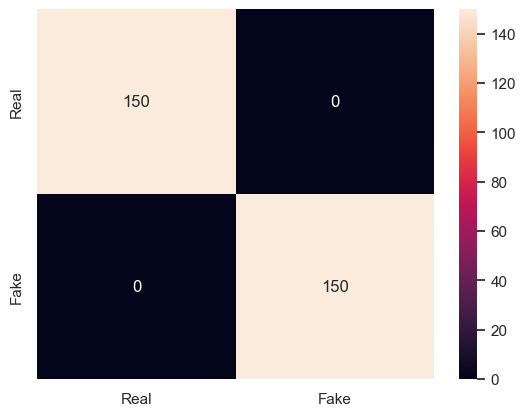

In [73]:
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth =5,min_samples_split =5)
dt.fit(x_train,y_train)

import pickle
filename = r'C:\Users\SONA\Music\fakeId\CODE\modified frond end_userinput\dt_Fake.pkl'
pickle.dump(dt, open(filename, 'wb'))

pred_test2 =dt.predict(x_test)
test_accuracy2 = accuracy_score(y_test, pred_test2)
pred_train = dt.predict(x_train)
train_accuracy2 =accuracy_score(y_train,pred_train)



print("AUC on Test data is " +str(accuracy_score(y_test,pred_test2)))
print("AUC on Train data is " +str(accuracy_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names =['Real','Fake']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test2.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [75]:
new = ['Decision Tree-Classifier',train_accuracy2, test_accuracy2]
all_model_result.loc[2] = new

# RANDOM FOREST

In [78]:
from sklearn.ensemble import RandomForestClassifier

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]

param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='accuracy',n_jobs=-1,cv=3)
model.fit(x_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)
optimal_max_depth = model.best_estimator_.max_depth
optimal_n_estimators = model.best_estimator_.n_estimators

optimal n_estimators 40
optimal max_depth 5


AUC on Test data is 1.0
AUC on Train data is 1.0
---------------------------


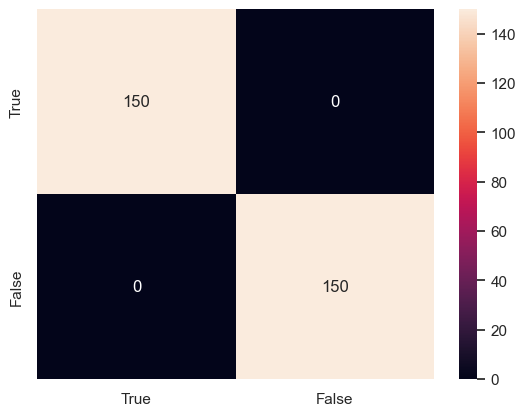

In [80]:
from sklearn.metrics import accuracy_score
#training our model for max_depth=100,n_estimators = 120
clf = RandomForestClassifier(max_depth = optimal_max_depth,n_estimators = optimal_n_estimators)
clf.fit(x_train,y_train)

import pickle
filename = r'C:\Users\SONA\Music\fakeId\CODE\modified frond end_userinput\rf_Fake.pkl'
pickle.dump(clf, open(filename, 'wb'))


pred_test3 =clf.predict(x_test)
test_accuracy3 = accuracy_score(y_test, pred_test3)
pred_train = clf.predict(x_train)
train_accuracy3 =accuracy_score(y_train,pred_train)




print("AUC on Test data is " +str(accuracy_score(y_test,pred_test3)))
print("AUC on Train data is " +str(accuracy_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names =['True','False']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test3.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [82]:
new = ['Random Forest',train_accuracy3, test_accuracy3]
all_model_result.loc[3] = new

In [84]:
all_model_result

,Classifier,Train-Accuracy,Test-Accuracy
0,KNN-Classifier,0.921429,0.890000
1,Logistic regression,0.941429,0.926667
2,Decision Tree-Classifier,1.000000,1.000000
3,Random Forest,1.000000,1.000000


# XG BOOST

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
AUC on Test data is 1.0
AUC on Train data is 1.0
---------------------------


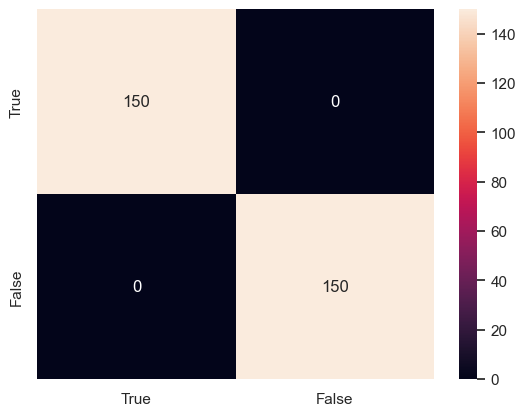

In [91]:
get_ipython().system('pip install xgboost')
get_ipython().system('pip install lightgbm')
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.04,random_state=1)
model.fit(x_train, y_train)

import pickle
filename = r'C:\Users\SONA\Music\fakeId\CODE\modified frond end_userinput\X_gb_Fake.pkl'
pickle.dump(model, open(filename, 'wb'))


pred_test4 =model.predict(x_test)
test_accuracy4 = accuracy_score(y_test, pred_test4)
pred_train = model.predict(x_train)
train_accuracy4 =accuracy_score(y_train,pred_train)




print("AUC on Test data is " +str(accuracy_score(y_test,pred_test4)))
print("AUC on Train data is " +str(accuracy_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names =['True','False']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test4.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [92]:
new = ['XG Boost',train_accuracy4, test_accuracy4]
all_model_result.loc[4] = new

In [93]:
all_model_result

,Classifier,Train-Accuracy,Test-Accuracy
0,KNN-Classifier,0.921429,0.890000
1,Logistic regression,0.941429,0.926667
2,Decision Tree-Classifier,1.000000,1.000000
3,Random Forest,1.000000,1.000000
4,XG Boost,1.000000,1.000000
